In [2]:
from MAUtil import *
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mendeleev import get_table
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [3]:
# cu = element('Cu')

In [4]:
df = pd.read_csv("slope_material.csv")
dfadd = pd.read_csv("slope_material_additional.csv") 

In [5]:
ptable = get_table('elements')

In [6]:
mend = ptable[ptable['symbol'].isin(df['symbol'])]
mendadd = ptable[ptable['symbol'].isin(dfadd['symbol'])]

In [7]:
df

,symbol,slope_i2_2_100,slope_i2_2_111,slope_i2_3_100,slope_i2_3_111
0,Cu,0.028105,0.036602,-0.040231,-0.038316
1,Ag,0.026112,0.046515,0.001103,-0.028977
2,Pt,0.138790,0.160172,0.107295,0.075915
3,Pd,0.155961,0.183004,0.100094,0.091591
4,Au,0.081645,0.172468,0.020570,0.019084
5,Al,-0.010895,-0.101814,-0.014677,-0.079796
6,Ni,0.071123,0.048294,0.067428,0.066727


In [8]:
merged = pd.merge(df, mend, on='symbol')
mergedadd = pd.merge(dfadd, mendadd, on='symbol')

In [9]:
for column in mergedadd.columns:
    if (mergedadd[column].isna()==True).any():
        merged = merged.drop(columns=column)
        mergedadd = mergedadd.drop(columns=column)
    elif type(mergedadd[column][0]) != np.float64 and type(mergedadd[column][0]) != np.int64:
        merged = merged.drop(columns=column)
        mergedadd = mergedadd.drop(columns=column)

In [10]:
merged

,slope_i2_2_100,slope_i2_2_111,slope_i2_3_100,slope_i2_3_111,atomic_number,atomic_radius,atomic_volume,boiling_point,density,dipole_polarizability,fusion_heat,group_id,lattice_constant,melting_point,period,series_id,specific_heat,thermal_conductivity,vdw_radius,covalent_radius_cordero,covalent_radius_pyykko,en_pauling,en_allen,heat_of_formation,covalent_radius_slater,vdw_radius_batsanov,vdw_radius_uff,vdw_radius_mm3,abundance_crust,en_ghosh,vdw_radius_alvarez,c6_gb,atomic_weight,atomic_weight_uncertainty,atomic_radius_rahm,metallic_radius,metallic_radius_c12,covalent_radius_pyykko_double,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number
0,0.028105,0.036602,-0.040231,-0.038316,29,128.0,7.1,2840.0,8.9600,46.50,13.01,11.0,3.61,1356.60,4,8,0.385,401.0,196.0,132.0,112.0,1.90,10.960,337.4,135.0,200.0,349.5,226.0,60.000,0.151172,238.0,264.0,63.546000,3.000000e-03,217.0,118.0,128.0,115.0,71,0.5,72.0,68.0
1,0.026112,0.046515,0.001103,-0.028977,47,144.0,10.3,2485.0,10.5000,55.00,11.95,11.0,4.09,1235.10,5,8,0.237,429.0,211.0,145.0,128.0,1.93,11.050,284.9,160.0,210.0,314.8,243.0,0.075,0.147217,253.0,341.0,107.868200,2.000000e-04,225.0,134.0,144.0,139.0,72,8.0,71.0,67.0
2,0.138790,0.160172,0.107295,0.075915,78,139.0,9.1,4100.0,21.4500,48.00,21.76,10.0,3.92,2045.00,6,8,0.133,71.6,213.0,136.0,123.0,2.20,10.160,565.7,135.0,205.0,275.4,239.0,0.005,0.256910,229.0,470.0,195.084000,9.000000e-03,230.0,130.0,139.0,112.0,69,4.0,68.0,64.0
3,0.155961,0.183004,0.100094,0.091591,46,137.0,8.9,3413.0,12.0200,26.14,17.24,10.0,3.89,1825.00,5,8,0.244,71.8,210.0,139.0,120.0,2.20,9.402,376.6,140.0,205.0,289.9,237.0,0.015,0.144028,215.0,628.0,106.420000,1.000000e-02,215.0,128.0,137.0,117.0,68,0.1,69.0,65.0
4,0.081645,0.172468,0.020570,0.019084,79,146.0,10.2,3080.0,19.3000,36.00,12.68,11.0,4.08,1337.58,6,8,0.129,318.0,214.0,136.0,124.0,2.40,11.330,368.2,135.0,210.0,329.3,243.0,0.004,0.261370,232.0,427.0,196.966569,5.000000e-06,226.0,134.0,144.0,121.0,73,3.0,70.0,66.0
5,-0.010895,-0.101814,-0.014677,-0.079796,13,143.0,10.0,2740.0,2.6989,57.80,10.75,13.0,4.05,933.50,3,7,0.900,237.0,184.0,121.0,126.0,1.61,9.539,330.9,125.0,210.0,449.9,236.0,82300.000,0.150078,225.0,520.0,26.981538,7.000000e-07,239.0,125.0,143.0,113.0,82,1.0,80.0,78.0
6,0.071123,0.048294,0.067428,0.066727,28,124.0,6.6,3005.0,8.9020,49.00,17.61,10.0,3.52,1726.00,4,8,0.443,90.9,197.0,124.0,110.0,1.91,11.130,430.1,135.0,200.0,283.4,222.0,84.000,0.147207,240.0,393.0,58.693400,4.000000e-04,219.0,115.0,124.0,101.0,67,3.0,67.0,69.0


In [11]:
merged.shape

(7, 42)

In [12]:
merged.corr().iloc[:4]

,slope_i2_2_100,slope_i2_2_111,slope_i2_3_100,slope_i2_3_111,atomic_number,atomic_radius,atomic_volume,boiling_point,density,dipole_polarizability,fusion_heat,group_id,lattice_constant,melting_point,period,series_id,specific_heat,thermal_conductivity,vdw_radius,covalent_radius_cordero,covalent_radius_pyykko,en_pauling,en_allen,heat_of_formation,covalent_radius_slater,vdw_radius_batsanov,vdw_radius_uff,vdw_radius_mm3,abundance_crust,en_ghosh,vdw_radius_alvarez,c6_gb,atomic_weight,atomic_weight_uncertainty,atomic_radius_rahm,metallic_radius,metallic_radius_c12,covalent_radius_pyykko_double,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number
slope_i2_2_100,1.000000,0.890330,0.900541,0.938795,0.637386,-0.061216,-0.088614,0.834778,0.707896,-0.755549,0.820647,-0.808725,-0.072481,0.898836,0.693053,0.583591,-0.684814,-0.699545,0.691046,0.399520,-0.102207,0.772090,-0.248586,0.664243,0.035259,-0.219347,-0.774584,0.157143,-0.583975,0.409799,-0.509860,0.530452,0.625398,0.826721,-0.425679,0.216436,-0.071451,-0.205822,-0.710505,-0.133385,-0.733760,-0.769791
slope_i2_2_111,0.890330,1.000000,0.665837,0.805801,0.833746,0.092537,0.043835,0.649479,0.860437,-0.798005,0.591381,-0.789270,0.056208,0.732130,0.890186,0.775656,-0.907999,-0.332307,0.892561,0.630922,-0.018330,0.961271,0.107842,0.461512,0.233522,-0.082715,-0.793935,0.324469,-0.776142,0.564867,-0.258703,0.251141,0.817172,0.609062,-0.498000,0.411543,0.057839,0.077889,-0.708083,0.049912,-0.789885,-0.918348
slope_i2_3_100,0.900541,0.665837,1.000000,0.930000,0.473597,-0.091198,-0.088027,0.807623,0.545507,-0.482126,0.886416,-0.728192,-0.078703,0.884611,0.516418,0.375700,-0.457093,-0.878481,0.513870,0.184840,-0.054628,0.530314,-0.335701,0.753378,-0.004140,-0.175549,-0.718815,0.084652,-0.375969,0.305382,-0.447393,0.620516,0.464321,0.713957,-0.205043,0.127233,-0.084810,-0.333606,-0.618515,0.000837,-0.657942,-0.547420
slope_i2_3_111,0.938795,0.805801,0.930000,1.000000,0.516153,-0.275694,-0.289789,0.740286,0.609919,-0.649862,0.863211,-0.896218,-0.281254,0.932917,0.583360,0.635792,-0.626602,-0.764333,0.600442,0.256563,-0.296987,0.674411,-0.083634,0.682834,0.053682,-0.374805,-0.864343,-0.065132,-0.635886,0.297240,-0.345426,0.421606,0.497229,0.665311,-0.504479,0.010075,-0.289103,-0.349844,-0.824984,-0.053919,-0.851185,-0.722797


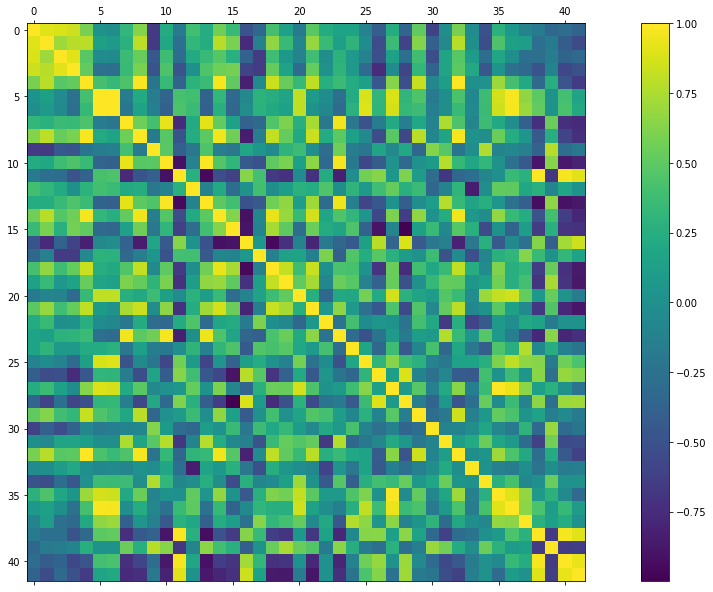

In [13]:
plt.figure(figsize=(20,10))
plt.matshow(mergedadd[:].corr(), fignum=1)
plt.colorbar()
plt.show()

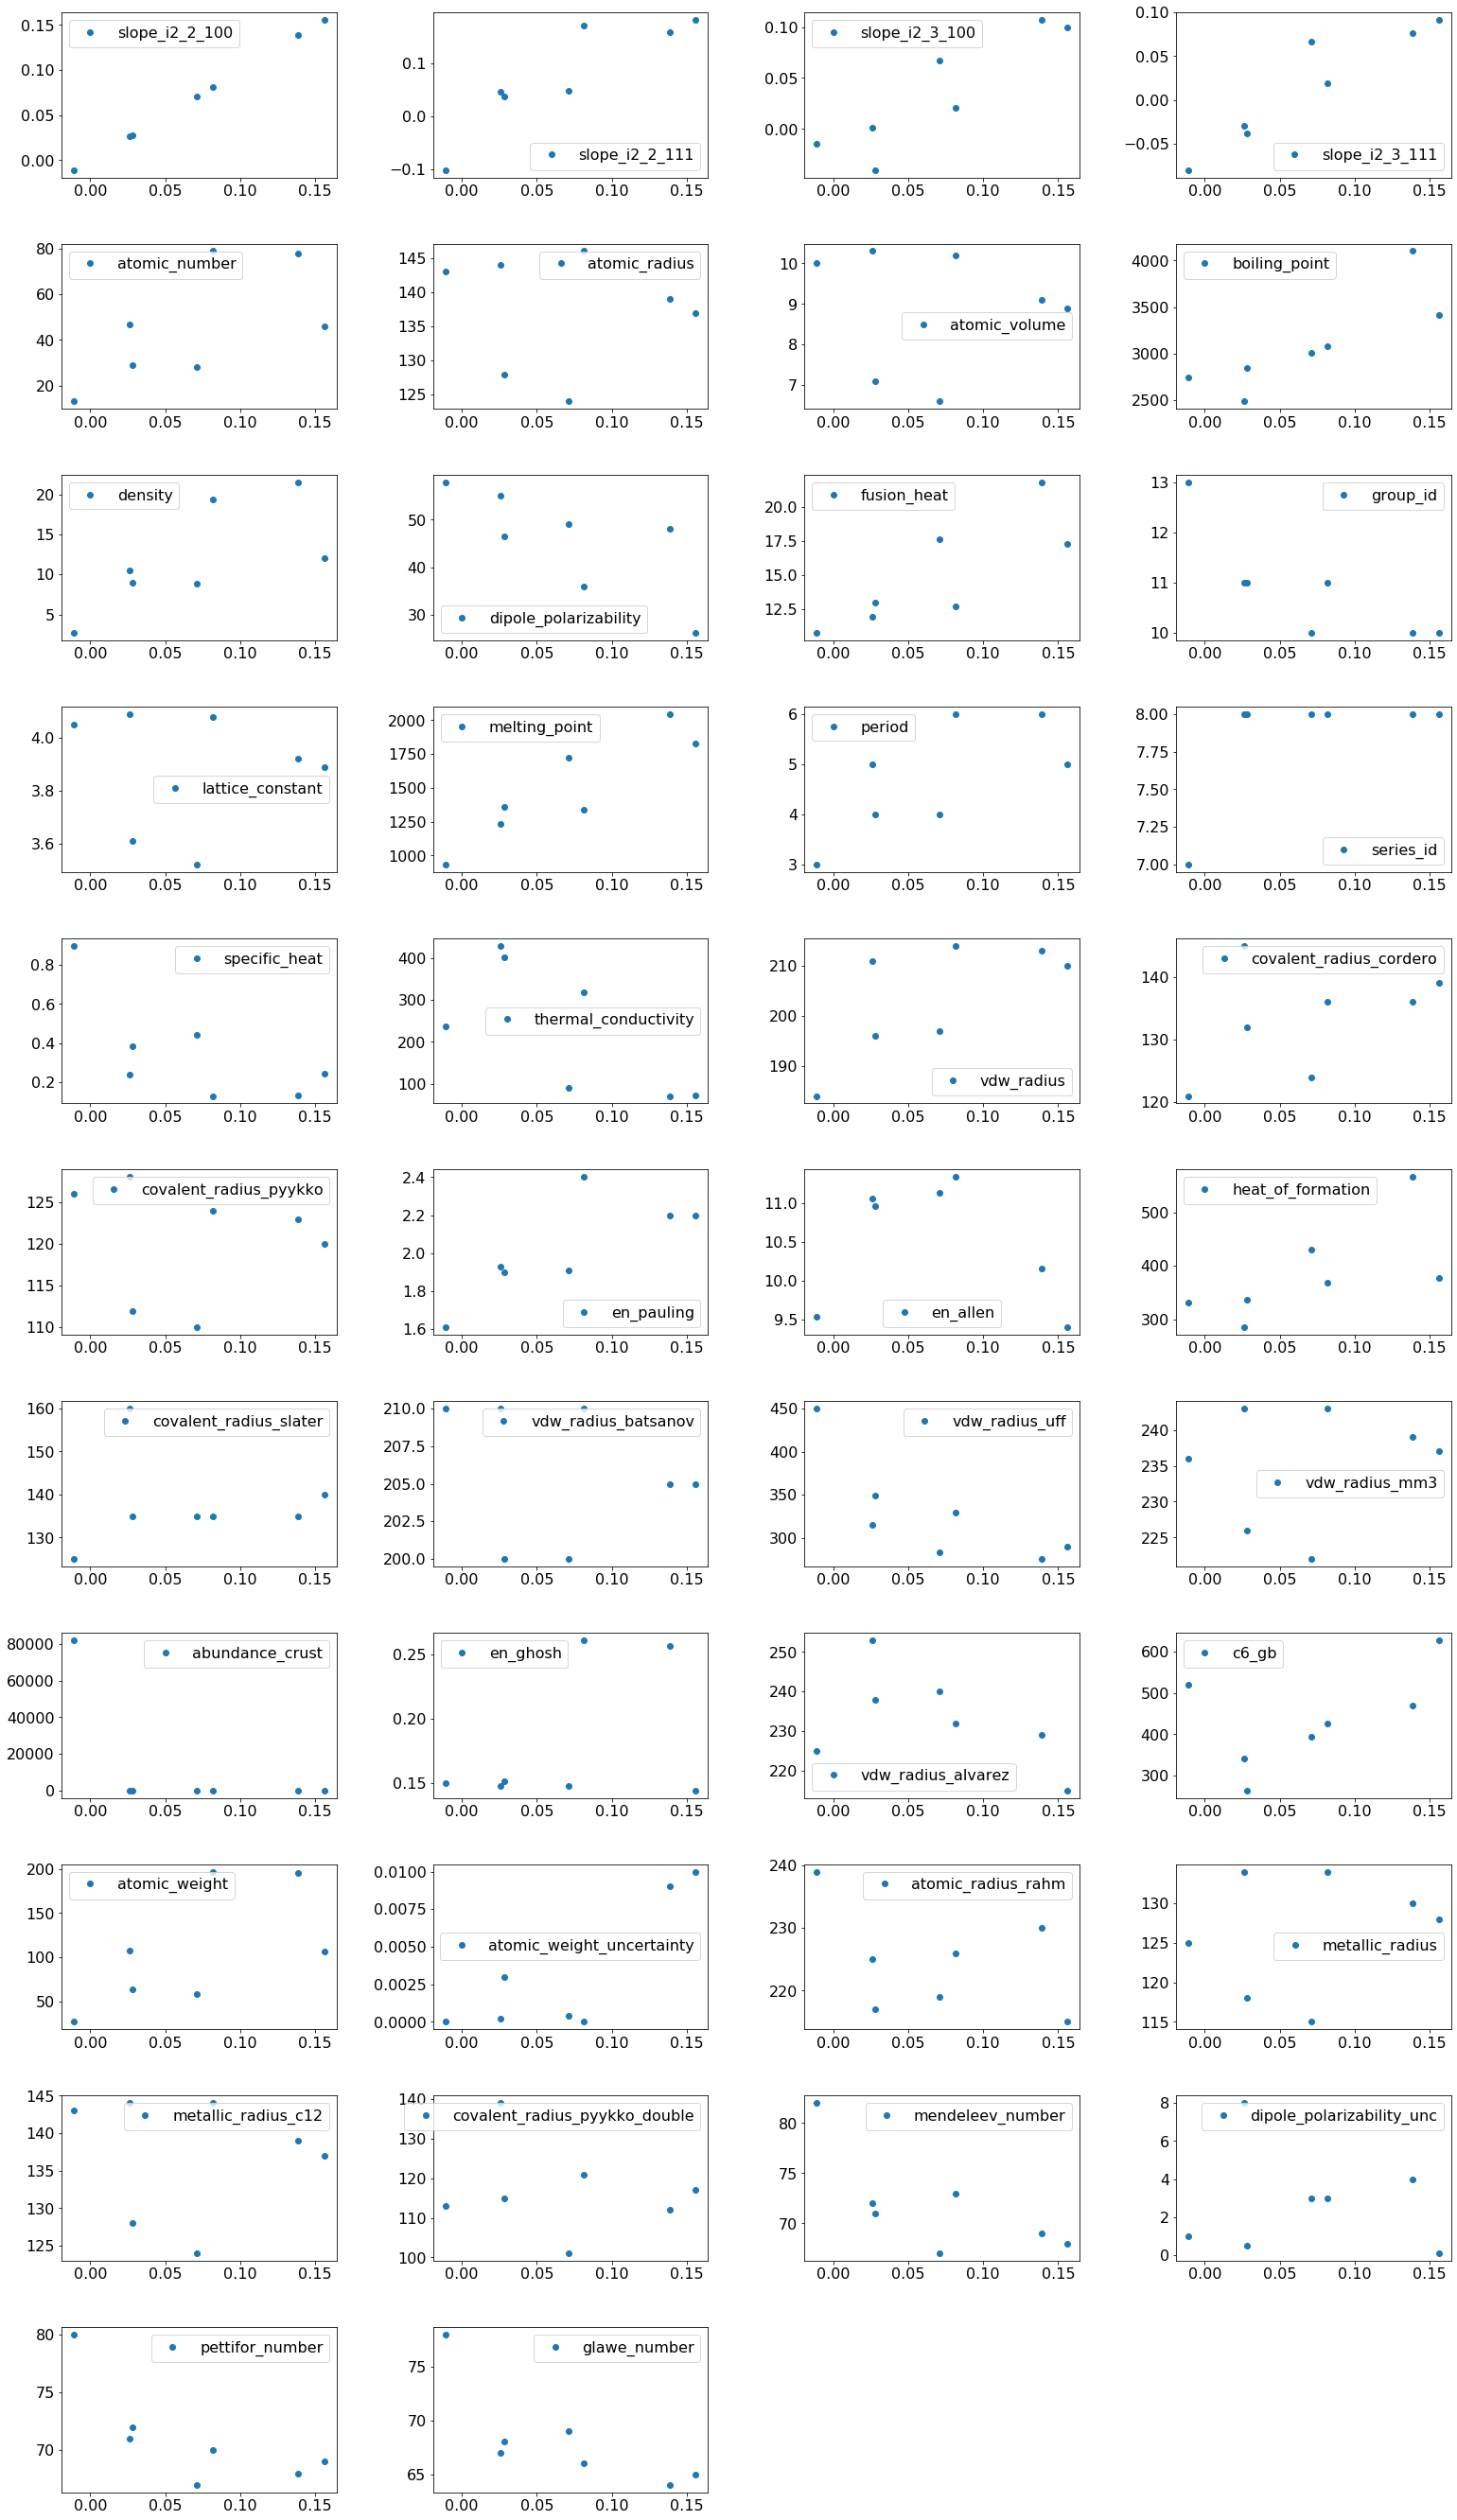

In [14]:
fig = plt.figure(figsize=(24,100))
plt.rcParams["font.size"] = 16

i = 0
for column in merged.columns:
    ax = fig.add_subplot(25, 4, i+1)
    ax.plot(merged['slope_i2_2_100'], merged[column], 'o')
    ax.legend([column])
    i += 1
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.35)
plt.show()

In [15]:
i=0 # 0~7
merged.corr().iloc[i][np.abs(merged.corr().iloc[i]) > 0.8]

slope_i2_2_100               1.000000
slope_i2_2_111               0.890330
slope_i2_3_100               0.900541
slope_i2_3_111               0.938795
boiling_point                0.834778
fusion_heat                  0.820647
group_id                    -0.808725
melting_point                0.898836
atomic_weight_uncertainty    0.826721
Name: slope_i2_2_100, dtype: float64

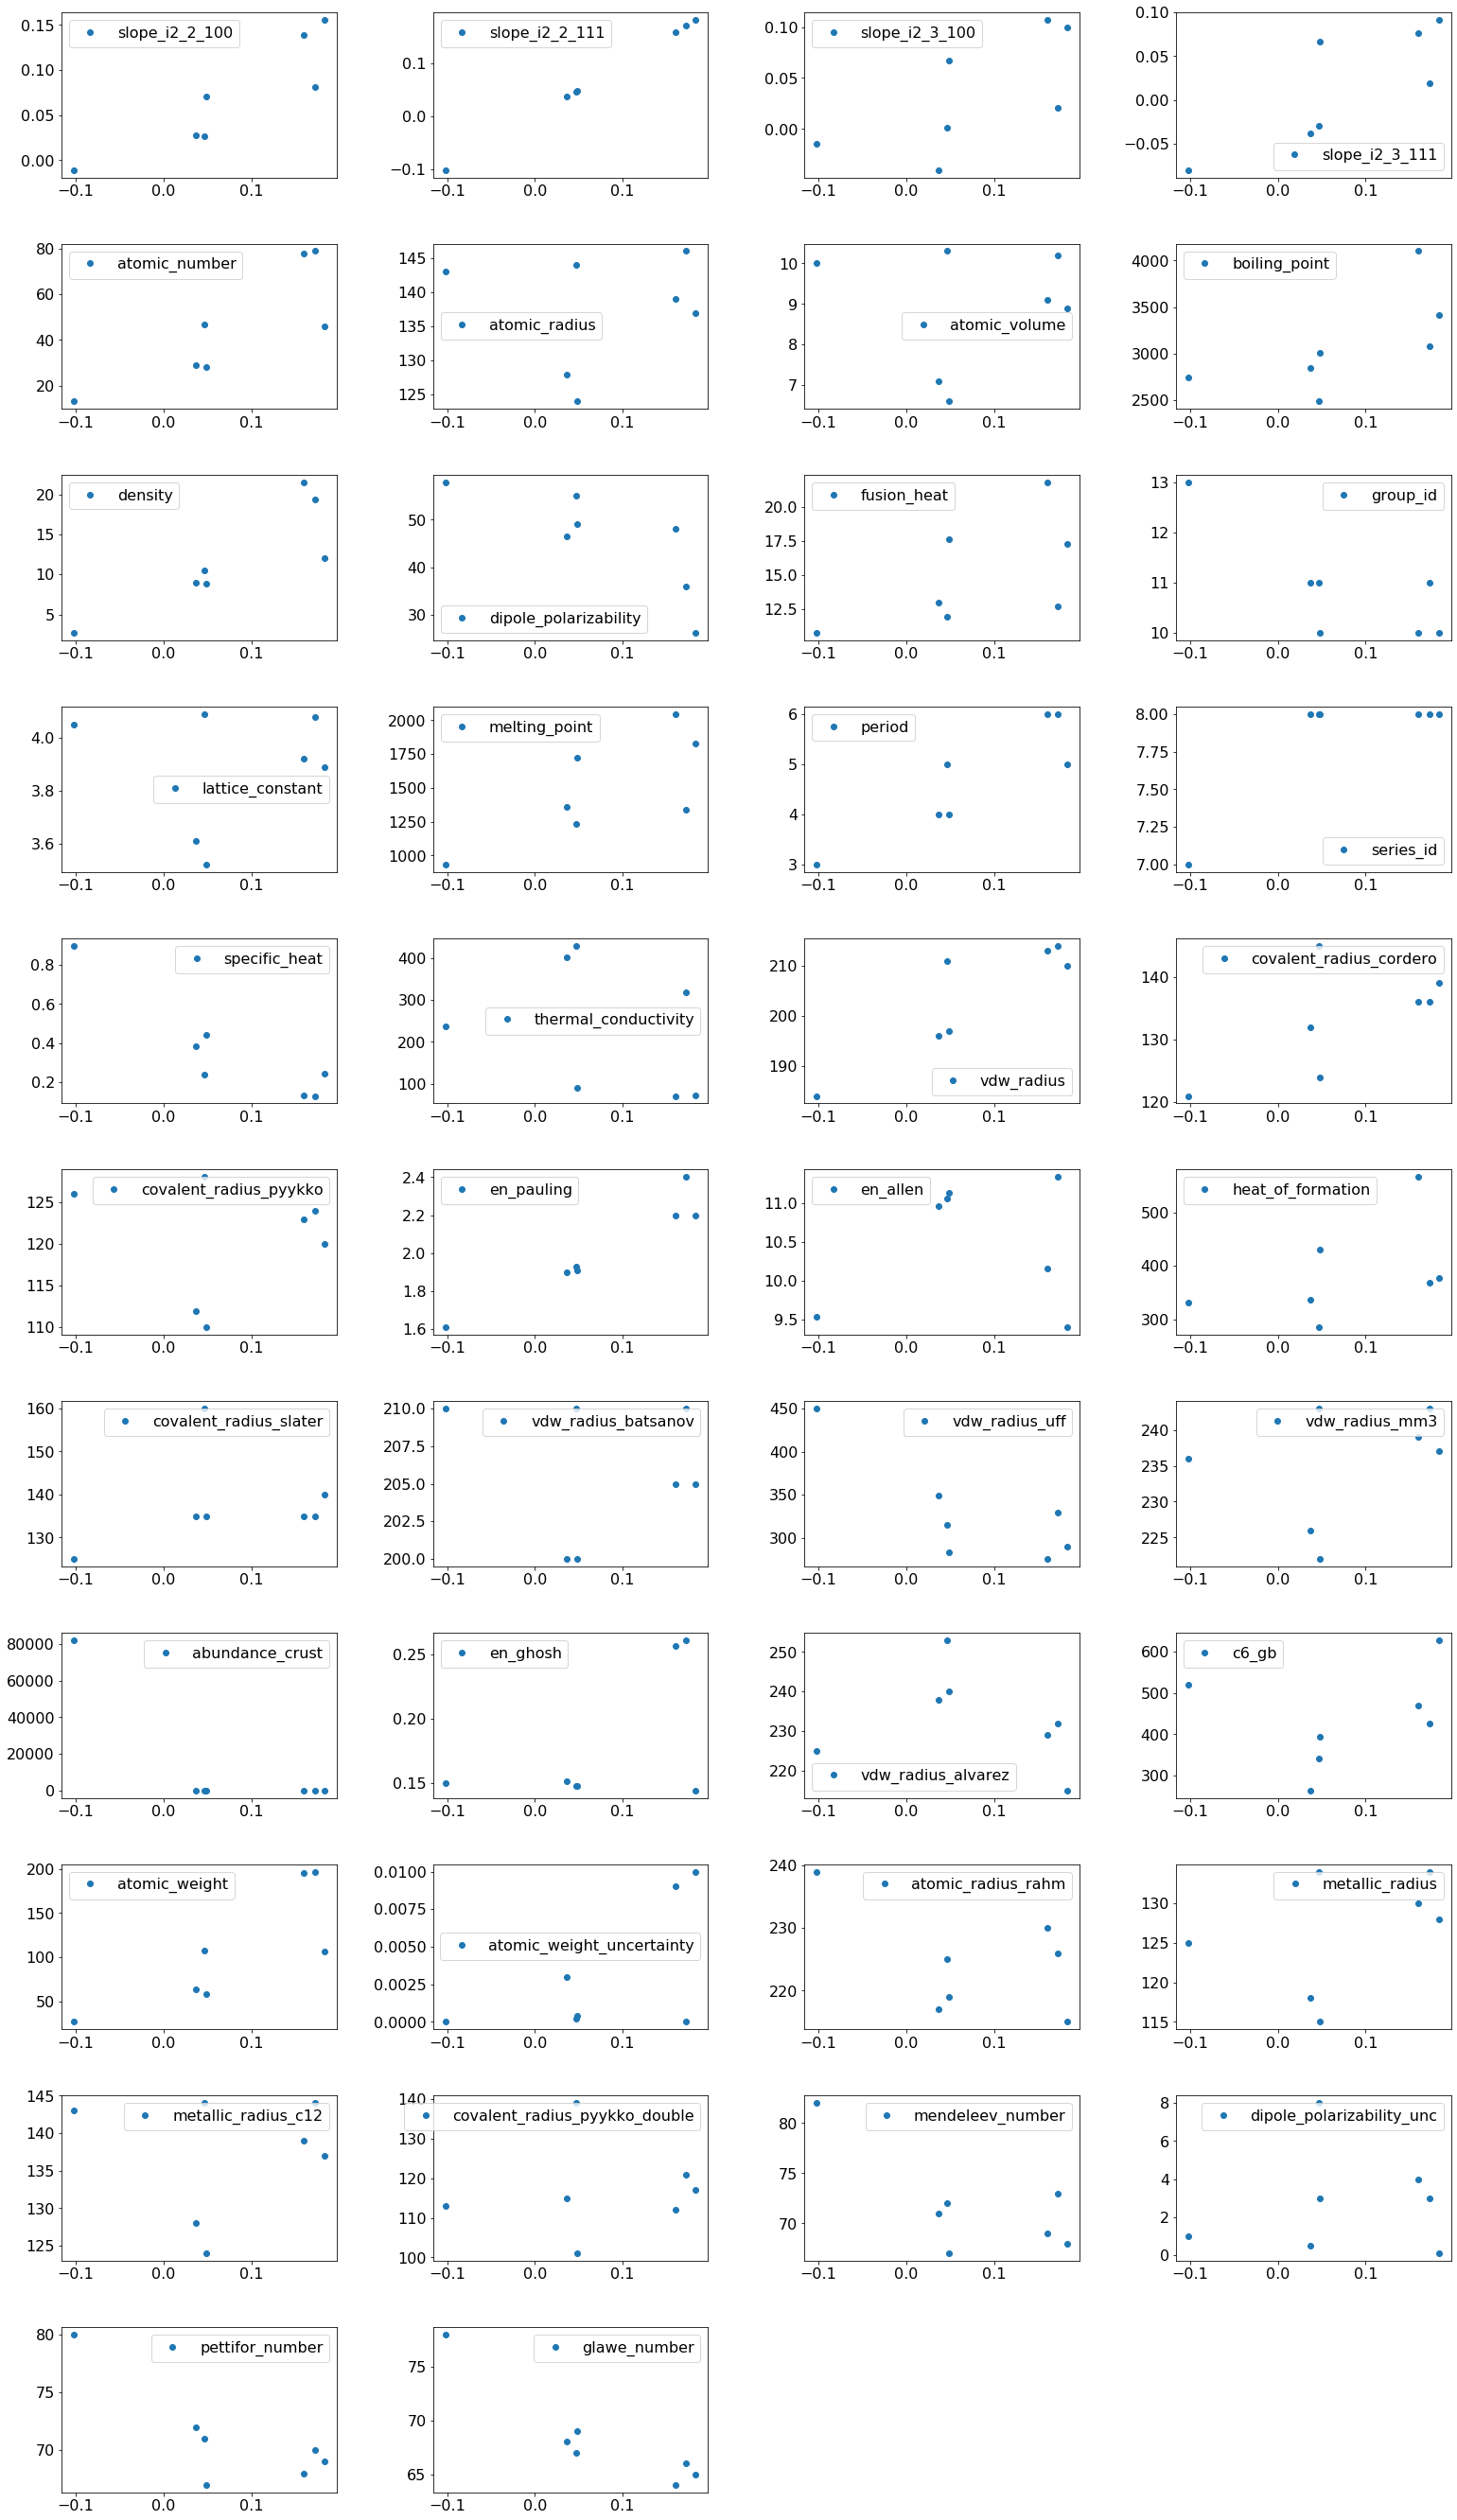

In [16]:
fig = plt.figure(figsize=(24,100))
plt.rcParams["font.size"] = 16

i = 0
for column in merged.columns:
    ax = fig.add_subplot(25, 4, i+1)
    ax.plot(merged['slope_i2_2_111'], merged[column], 'o')
    ax.legend([column])
    i += 1
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.35)
plt.show()

In [17]:
i=1 # 0~7
merged.corr().iloc[i][np.abs(merged.corr().iloc[i]) > 0.8]

slope_i2_2_100    0.890330
slope_i2_2_111    1.000000
slope_i2_3_111    0.805801
atomic_number     0.833746
density           0.860437
period            0.890186
specific_heat    -0.907999
vdw_radius        0.892561
en_pauling        0.961271
atomic_weight     0.817172
glawe_number     -0.918348
Name: slope_i2_2_111, dtype: float64

In [32]:
alpha = 0.05

from sklearn import linear_model
lasso = linear_model.Lasso(alpha=alpha)

In [33]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()

sscaler.fit(merged.T[4:].T)
X = sscaler.transform(merged.T[4:].T)

In [34]:
lasso.fit(X, merged['slope_i2_2_111'])

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
prediction = lasso.predict(X)

for i in range(len(df)):
    print(merged['slope_i2_2_111'][i], prediction[i])

0.03660233 0.061360761210992945
0.04651525 0.06754080185805271
0.16017188 0.11101412947039066
0.183004 0.10898962310185735
0.17246823 0.13466867859016696
-0.10181438 0.000945532833237589
0.04829365 0.060721432935301786


In [36]:
lasso.coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.03360044,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.00875324])

In [37]:
lasso.sparse_coef_

<1x38 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [38]:
lasso.intercept_  

0.07789156571428571

In [39]:
np.argmax(lasso.coef_)

17

In [40]:
Xadd = sscaler.transform(mergedadd.T[4:].T)

In [41]:
predictionadd = lasso.predict(Xadd)

for i in range(len(dfadd)):
    print(mergedadd['slope_i2_2_111'][i], predictionadd[i])

0.03660233 0.061360761210992945
0.04651525 0.06754080185805271
0.16017188 0.11101412947039066
0.183004 0.10898962310185735
0.17246823 0.13466867859016696
-0.10181438 0.000945532833237589
0.04829365 0.060721432935301786
0.0 0.1241200605816611
0.0 0.11708764857599059
0.0 0.014584270678739394
